In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/full-filled-brain-stroke-dataset/full_data.csv
/kaggle/input/full-filled-brain-stroke-dataset/full_filled_stroke_data (1).csv


![](https://miro.medium.com/max/1400/1*WrLgzfEANvvvd0SNL_Mb_A.png)

### Actually, I could have done all my work on this subject (stroke prediction) with a single notebook, but this would be very complex for review, and unfortunately, would cause a loss of information. I really work hard to create something different. I also have a hard time reading long notebooks and I think it would be more beneficial if they were in separated by goal sections.

In [2]:
# Required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt;
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler,MinMaxScaler

#### I have used handled bmi features.
#### You can check-up that how handling of missing values with this [link.](https://www.kaggle.com/code/zzettrkalpakbal/pycaret-regressor-for-integrating-missing-values)


In [3]:
df = pd.read_csv("../input/full-filled-brain-stroke-dataset/full_data.csv")

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTS2WQYfu3aLkmpLTyc3so7aktnshobxZ30qQ&usqp=CAU)

* A stroke is a medical condition in which poor blood flow to the brain causes cell death. There are two main types of stroke: ischemic, due to lack of blood flow, and hemorrhagic, due to bleeding. Both cause parts of the brain to stop functioning properly. Signs and symptoms of a stroke may include an inability to move or feel on one side of the body, problems understanding or speaking, dizziness, or loss of vision to one side. Signs and symptoms often appear soon after the stroke has occurred. If symptoms last less than one or two hours, the stroke is a transient ischemic attack (TIA), also called a mini-stroke. A hemorrhagic stroke may also be associated with a severe headache. The symptoms of a stroke can be permanent. Long-term complications may include pneumonia and loss of bladder control.

* The main risk factor for stroke is high blood pressure. Other risk factors include high blood cholesterol, tobacco smoking, obesity, diabetes mellitus, a previous TIA, end-stage kidney disease, and atrial fibrillation. An ischemic stroke is typically caused by blockage of a blood vessel, though there are also less common causes. A hemorrhagic stroke is caused by either bleeding directly into the brain or into the space between the brain's membranes. Bleeding may occur due to a ruptured brain aneurysm. Diagnosis is typically based on a physical exam and supported by medical imaging such as a CT scan or MRI scan. A CT scan can rule out bleeding, but may not necessarily rule out ischemia, which early on typically does not show up on a CT scan. Other tests such as an electrocardiogram (ECG) and blood tests are done to determine risk factors and rule out other possible causes. Low blood sugar may cause similar symptoms.

* Prevention includes decreasing risk factors, surgery to open up the arteries to the brain in those with problematic carotid narrowing, and warfarin in people with atrial fibrillation. Aspirin or statins may be recommended by physicians for prevention. A stroke or TIA often requires emergency care. An ischemic stroke, if detected within three to four and half hours, may be treatable with a medication that can break down the clot. Some hemorrhagic strokes benefit from surgery. Treatment to attempt recovery of lost function is called stroke rehabilitation, and ideally takes place in a stroke unit; however, these are not available in much of the world.

* Attribute Information
    * 1) gender: "Male", "Female" or "Other"
    * 2) age: age of the patient
    * 3) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
    * 4) heartdisease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
    * 5) evermarried: "No" or "Yes"
    * 6) worktype: "children", "Govtjov", "Neverworked", "Private" or "Self-employed" 7) Residencetype: "Rural" or "Urban"
    * 8) avgglucoselevel: average glucose level in blood
    * 9) bmi: body mass index
    * 10) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"
        * Note: "Unknown" in smoking_status means that the information is unavailable for this patient
    * 11) stroke: 1 if the patient had a stroke or 0 if not


Real data sources:

In [4]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


# CART analysis

As computing power and statistical insight has grown, increasingly complex and detailed
regression techniques have emerged to analyze data. While this expanding set of techniques
has proved beneficial in properly modeling certain data, it has also increased the burden
on statistical practitioners in choosing appropriate techniques. Arguably an even heavier
burden has been placed on non-statistician health practitioners – in university, government,
and private sectors – where statistical software allows for immediate implementation of complex regression techniques without interpretation or guidance. In response to this growing
complexity, a simple tree system, Classification and Regression Tree (CART) analysis, has
become increasingly popular, and is particularly valuable in multidisciplinary fields.

Those who want to continue reading can use this [link](https://www.bu.edu/sph/files/2014/05/MorganCART.pdf).

*Classification and Regression Tree Analysis Jake Morgan Boston University*

Also source of code: 
[Medium Link is here](https://towardsdatascience.com/cart-classification-and-regression-trees-for-clean-but-powerful-models-cc89e60b7a85)

In [5]:
from sklearn.model_selection import train_test_split # for splitting the data into train and test samples
from sklearn.metrics import classification_report # for model evaluation metrics
from sklearn import tree # for decision tree models

import plotly.express as px  # for data visualization
import plotly.graph_objects as go # for data visualization
import graphviz # for plotting decision tree graphs

In [6]:
def fitting(X, y, criterion, splitter, mdepth, clweight, minleaf):

    # Create training and testing samples
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Fit the model
    model = tree.DecisionTreeClassifier(criterion=criterion, 
                                        splitter=splitter, 
                                        max_depth=mdepth,
                                        class_weight=clweight,
                                        min_samples_leaf=minleaf, 
                                        random_state=0, 
                                  )
    clf = model.fit(X_train, y_train)

    # Predict class labels on training data
    pred_labels_tr = model.predict(X_train)
    # Predict class labels on a test data
    pred_labels_te = model.predict(X_test)

    # Tree summary and model evaluation metrics
    print('*************** Tree Summary ***************')
    print('Classes: ', clf.classes_)
    print('Tree Depth: ', clf.tree_.max_depth)
    print('No. of leaves: ', clf.tree_.n_leaves)
    print('No. of features: ', clf.n_features_in_)
    print('--------------------------------------------------------')
    print("")
    
    print('*************** Evaluation on Test Data ***************')
    score_te = model.score(X_test, y_test)
    print('Accuracy Score: ', score_te)
    # Look at classification report to evaluate the model
    print(classification_report(y_test, pred_labels_te))
    print('--------------------------------------------------------')
    print("")
    
    print('*************** Evaluation on Training Data ***************')
    score_tr = model.score(X_train, y_train)
    print('Accuracy Score: ', score_tr)
    # Look at classification report to evaluate the model
    print(classification_report(y_train, pred_labels_tr))
    print('--------------------------------------------------------')
    
    # Use graphviz to plot the tree
    plt.figure(figsize=(20,10))
    dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=X.columns, 
                                class_names=[str(list(clf.classes_)[0]), str(list(clf.classes_)[1])],
                                filled=True, 
                                rounded=True, 
                                rotate=True,
                               )
    
    graph = graphviz.Source(dot_data)
    text = tree.export_text(clf,feature_names=list(X.columns.values))
    
    # Return relevant data for chart plotting
    return X_train, X_test, y_train, y_test, clf, graph, text

In [7]:
def Plot_3D(X, X_test, y_test, clf, x1, x2, mesh_size, margin):
            
    # Specify a size of the mesh to be used
    mesh_size=mesh_size
    margin=margin

    # Create a mesh grid on which we will run our model
    x_min, x_max = X.iloc[:, 0].fillna(X.mean()).min() - margin, X.iloc[:, 0].fillna(X.mean()).max() + margin
    y_min, y_max = X.iloc[:, 1].fillna(X.mean()).min() - margin, X.iloc[:, 1].fillna(X.mean()).max() + margin
    xrange = np.arange(x_min, x_max, mesh_size)
    yrange = np.arange(y_min, y_max, mesh_size)
    xx, yy = np.meshgrid(xrange, yrange)
            
    # Calculate predictions on grid
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)

    # Create a 3D scatter plot with predictions
    fig = px.scatter_3d(x=X_test[x1], y=X_test[x2], z=y_test,
                     opacity=0.8, color_discrete_sequence=['black'])

    # Set figure title and colors
    fig.update_layout(#title_text="Scatter 3D Plot with CART Prediction Surface",
                      paper_bgcolor = 'white',
                      scene = dict(xaxis=dict(title=x1,
                                              backgroundcolor='white',
                                              color='black',
                                              gridcolor='#f0f0f0'),
                                   yaxis=dict(title=x2,
                                              backgroundcolor='white',
                                              color='black',
                                              gridcolor='#f0f0f0'
                                              ),
                                   zaxis=dict(title='Probability of Rain Tomorrow',
                                              backgroundcolor='lightgrey',
                                              color='black', 
                                              gridcolor='#f0f0f0', 
                                              )))
    
    # Update marker size
    fig.update_traces(marker=dict(size=1))

    # Add prediction plane
    fig.add_traces(go.Surface(x=xrange, y=yrange, z=Z, name='CART Prediction',
                              colorscale='Jet',
                              reversescale=True,
                              showscale=False, 
                              contours = {"z": {"show": True, "start": 0.5, "end": 0.9, "size": 0.5}}))
    fig.show()
    return fig

In [8]:
X = df.drop(columns="stroke")
X = pd.get_dummies(data= X, columns=['gender', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level',
       'smoking_status'],drop_first=False)
y = df.stroke

*************** Tree Summary ***************
Classes:  [0 1]
Tree Depth:  5
No. of leaves:  14
No. of features:  3915
--------------------------------------------------------

*************** Evaluation on Test Data ***************
Accuracy Score:  0.9498495486459378
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       947
           1       0.00      0.00      0.00        50

    accuracy                           0.95       997
   macro avg       0.47      0.50      0.49       997
weighted avg       0.90      0.95      0.93       997

--------------------------------------------------------

*************** Evaluation on Training Data ***************
Accuracy Score:  0.9503012048192772
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      3786
           1       0.00      0.00      0.00       198

    accuracy                           0.95      3984
   macro avg       0.48      0.50

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classificat

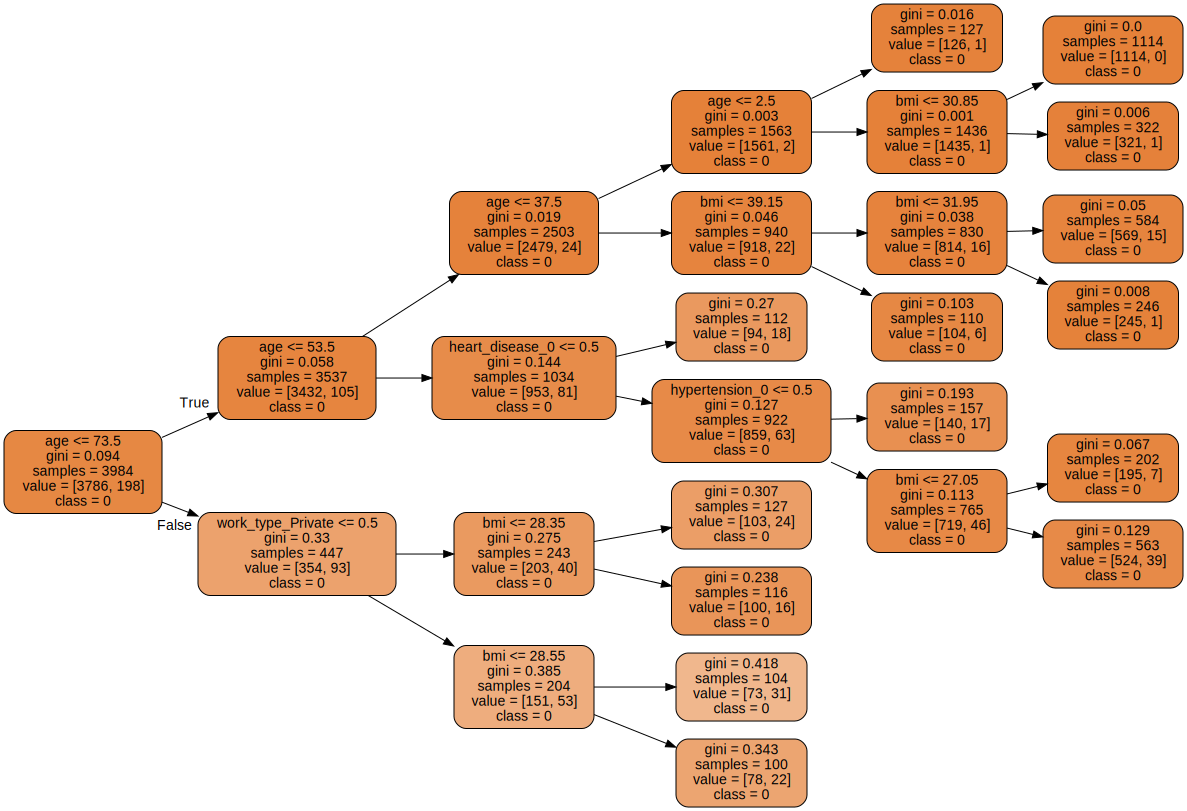

<Figure size 1440x720 with 0 Axes>

In [9]:
X_train, X_test, y_train, y_test, clf, graph, text = fitting(X, y, 'gini', 'best', 
                                                       mdepth=5, 
                                                       clweight=None,
                                                       minleaf=100)

# Plot the tree graph
graph

In [10]:
print(text)

|--- age <= 73.50
|   |--- age <= 53.50
|   |   |--- age <= 37.50
|   |   |   |--- age <= 2.50
|   |   |   |   |--- class: 0
|   |   |   |--- age >  2.50
|   |   |   |   |--- bmi <= 30.85
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- bmi >  30.85
|   |   |   |   |   |--- class: 0
|   |   |--- age >  37.50
|   |   |   |--- bmi <= 39.15
|   |   |   |   |--- bmi <= 31.95
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- bmi >  31.95
|   |   |   |   |   |--- class: 0
|   |   |   |--- bmi >  39.15
|   |   |   |   |--- class: 0
|   |--- age >  53.50
|   |   |--- heart_disease_0 <= 0.50
|   |   |   |--- class: 0
|   |   |--- heart_disease_0 >  0.50
|   |   |   |--- hypertension_0 <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- hypertension_0 >  0.50
|   |   |   |   |--- bmi <= 27.05
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- bmi >  27.05
|   |   |   |   |   |--- class: 0
|--- age >  73.50
|   |--- work_type_Private <= 0.50
|   |   |--- bmi <= 28.35
|   |   |  

### I wanted to show the distribution of target values when I separated the data from the threshold values I obtained from the result of the CART algorithm.

(0.0, 150.0)

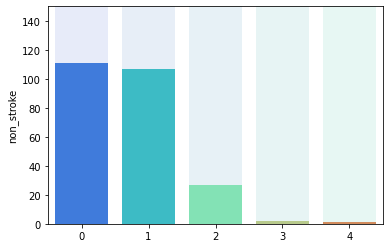

In [11]:
t = df[(df.age>73.5)].stroke.value_counts().values
x = df[(df.age<=73.5)&(df.age>53.5)].stroke.value_counts().values
y = df[(df.age<=53.5)&(df.age>37.5)].stroke.value_counts().values
z = df[(df.age<=37.5)&(df.age>2)].stroke.value_counts().values
q = df[(df.age<=2)].stroke.value_counts().values
non_stroke = []
stroke = []
for i in [t,x,y,z,q]:
    non_stroke.append(i[0])
    stroke.append(i[1])
values = pd.DataFrame()
values["stroke"] = stroke
values["non_stroke"] = non_stroke
sns.barplot(x=values.index,y=values["stroke"],palette="rainbow")
sns.barplot(x=values.index,y=values["non_stroke"],palette="winter",alpha=0.1)
plt.ylim(0,150)

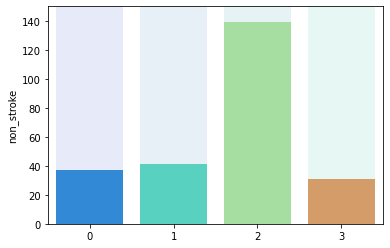

In [12]:
a = df[(df.avg_glucose_level>=213.47)].stroke.value_counts()
b = df[(df.avg_glucose_level<213.47)&(df.avg_glucose_level>=180.86)].stroke.value_counts()
c = df[(df.avg_glucose_level<180.86)&(df.avg_glucose_level>=70.44)].stroke.value_counts()
d = df[(df.avg_glucose_level<70.44)].stroke.value_counts()
non_stroke = []
stroke = []
for i in [a,b,c,d]:
    non_stroke.append(i[0])
    stroke.append(i[1])
values = pd.DataFrame()
values["stroke"] = stroke
values["non_stroke"] = non_stroke
sns.barplot(x=values.index,y=values["stroke"],palette="rainbow")
sns.barplot(x=values.index,y=values["non_stroke"],palette="winter",alpha=0.1)
plt.ylim(0,150)
plt.show()

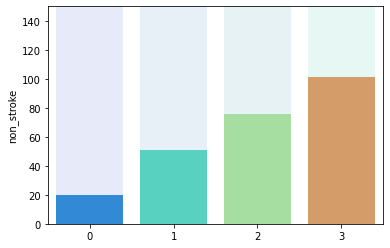

In [13]:
i = df[(df.bmi>=39.15)].stroke.value_counts()
j = df[(df.bmi<39.15)&(df.bmi>=31.95)].stroke.value_counts()
k = df[(df.bmi<31.95)&(df.bmi>=28.35)].stroke.value_counts()
l = df[(df.bmi<28.35)].stroke.value_counts()
non_stroke = []
stroke = []
for i in [i,j,k,l]:
    non_stroke.append(i[0])
    stroke.append(i[1])
values = pd.DataFrame()
values["stroke"] = stroke
values["non_stroke"] = non_stroke
sns.barplot(x=values.index,y=values["stroke"],palette="rainbow")
sns.barplot(x=values.index,y=values["non_stroke"],palette="winter",alpha=0.1)
plt.ylim(0,150)
plt.show()

In [14]:
# Here 3D plot

X=df[['bmi', 'avg_glucose_level']]
y=df['stroke']
# Fit the model and display results
X_train, X_test, y_train, y_test, clf, graph, text = fitting(X, y, 'gini', 'best', 
                                                       mdepth=5, 
                                                       clweight=None, 
                                                       minleaf=100)

# Plot the tree graph
# graph (You can use this for plot)

*************** Tree Summary ***************
Classes:  [0 1]
Tree Depth:  5
No. of leaves:  17
No. of features:  2
--------------------------------------------------------

*************** Evaluation on Test Data ***************
Accuracy Score:  0.9498495486459378
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       947
           1       0.00      0.00      0.00        50

    accuracy                           0.95       997
   macro avg       0.47      0.50      0.49       997
weighted avg       0.90      0.95      0.93       997

--------------------------------------------------------

*************** Evaluation on Training Data ***************
Accuracy Score:  0.9503012048192772
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      3786
           1       0.00      0.00      0.00       198

    accuracy                           0.95      3984
   macro avg       0.48      0.50   

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classificat

<Figure size 1440x720 with 0 Axes>

In [15]:
fig = Plot_3D(X, X_test, y_test, clf, x1='bmi', x2='avg_glucose_level', mesh_size=1, margin=1)

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [16]:
# Here is extremly detailed 3D plot

X=df[['bmi', 'avg_glucose_level']]
y=df['stroke']
# Fit the model and display results
X_train, X_test, y_train, y_test, clf, graph, text = fitting(X, y, 'gini', 'best', 
                                                       mdepth=None, 
                                                       clweight=None, 
                                                       minleaf=25)

# Plot the tree graph
# graph (You can use this for plot)
fig = Plot_3D(X, X_test, y_test, clf, x1='bmi', x2='avg_glucose_level', mesh_size=1, margin=1)

*************** Tree Summary ***************
Classes:  [0 1]
Tree Depth:  15
No. of leaves:  95
No. of features:  2
--------------------------------------------------------

*************** Evaluation on Test Data ***************
Accuracy Score:  0.9498495486459378
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       947
           1       0.00      0.00      0.00        50

    accuracy                           0.95       997
   macro avg       0.47      0.50      0.49       997
weighted avg       0.90      0.95      0.93       997

--------------------------------------------------------

*************** Evaluation on Training Data ***************
Accuracy Score:  0.9503012048192772
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      3786
           1       0.00      0.00      0.00       198

    accuracy                           0.95      3984
   macro avg       0.48      0.50  

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` param

<Figure size 1440x720 with 0 Axes>

#  CART is very simple and explainable statistical method for discrimining to target.
### Thank you Saul Dobilas for clean reusable code.
[Medium Link is here](https://towardsdatascience.com/cart-classification-and-regression-trees-for-clean-but-powerful-models-cc89e60b7a85)

I think is CART algorithm fails to care about categorical variables. Because this algorithm assumed categorical feature values of just one and zero but numeric features have bigger values. By the way, the result of the test was very good. I prepared this notebook for an experimental goal. Because I am really curious that, how I must create categorical features from numeric features. The most commonly used method is separating with the same intervals and stratification with quantiles. But my experience in medicine showed that this stratification threshold is wrongly chosen. For example, I have already dropped some values in the "BMI" feature that are bigger than 60 and smaller than 14. But some notebooks include them and are replaced them with some values. But other hand, when I used medical categorization guides also doesn't result in good model performance. After this notebook, I will compare some methods for creating categorical features.

## Keep contact
![](https://sd.keepcalms.com/i-w600/please-follow-me-and-like-this.jpg)